# <font color='red'> Project 1 Group 12 - Mitali Bharali & Prithvi Shivashankar

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

# <font color='green'> Project Brief:
We went through the basic data processing for both the datasets, audit risk and trail. We found several columns derived from others, like Risk A,B,C.. are derivatives of Audit Risk column, Score_A, Score_B are same as SCORE_A and SCORE_B, just scaled differently. We also found duplicate columns in both Audit_Risk and Trail. Since there isn't any supporting data description, we took this purely in terms of Data Minning aproach, doing as per what data tells us from the basic pre processing. The features chosen for the regression model was the main contributing factor alongside the removal of outliers in the model. The feautures were chosen by looking at the correlation heat map as well reference to the research paper.

The flow/order of work is described as below:
* Data Preprocessing - checking for na values, replacing missing values,incorrect values,droping repeated columns.
* Merge - we used join using the common columns as index for the merge. 
* Visualization - heat map to look for correl columns and box plot to identify outliers
* Regression and Classification tasks:
    * MODEL RUN
    * GRID SEARCH if required
    * Cross Validation- naive and Kfold
    * Model Evaluation for Classification- Precision, Recall, F1 score and Support; Accuracy for Regresion

Note: Based on the reference from the research paper provided, we found that the Risk column calulcated in the Audit_Risk table has been basically derived from the Audit Risk column in that table. That was removed as it was casuing a lot of duplicate as well as null values while merging the Audit_Risk as well as the Trial table.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

In [3]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [4]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [5]:
audit_risk.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [6]:
trial.isna().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [7]:
nan_rows = audit_risk[audit_risk['Money_Value'].isnull()]
nan_rows

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
642,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,...,0.4,0,0.2,0.0,2.0,1.446,0.4,0.5,0.2892,0


In [8]:
nan_rows_trial = trial[trial['Money_Value'].isnull()]
nan_rows_trial

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
642,55.57,4,0.23,2,0.0,2,0.23,5.0,2,NaN,2,2,0,2,0,2,2.0,0


In [9]:
audit_risk.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [10]:
audit_risk.fillna(audit_risk.median(), inplace=True)

In [11]:
audit_risk.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [12]:
trial.fillna(trial.median(), inplace=True)

In [13]:
trial.isna().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [14]:
audit_risk.info()

trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [15]:
audit_risk.describe(include = 'O')
                        

,LOCATION_ID
count,776
unique,45
top,8
freq,76


In [16]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [17]:
audit_risk=audit_risk.drop(['Risk'],axis=1)
audit_risk

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,23,4.18,0.6,2.508,2.5000,0.2,0.50000,6.6800,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.57400,0.4,0.5,1.714800
1,3.89,6,0.00,0.2,0.000,4.8300,0.2,0.96600,4.8300,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.55400,0.4,0.5,0.510800
2,3.89,6,0.51,0.2,0.102,0.2300,0.2,0.04600,0.7400,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.54800,0.4,0.5,0.309600
3,3.89,6,0.00,0.2,0.000,10.8000,0.6,6.48000,10.8000,6.0,...,0.2,0.4,0,0.2,0.0,4.4,17.53000,0.4,0.5,3.506000
4,3.89,6,0.00,0.2,0.000,0.0800,0.2,0.01600,0.0800,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.41600,0.4,0.5,0.283200
5,3.89,6,0.00,0.2,0.000,0.8300,0.2,0.16600,0.8300,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.15600,0.4,0.5,0.431200
6,3.89,7,1.10,0.4,0.440,7.4100,0.4,2.96400,8.5100,5.0,...,0.2,0.4,0,0.2,0.0,3.2,31.77400,0.4,0.5,6.354800
7,3.89,8,8.50,0.6,5.100,12.0300,0.6,7.21800,20.5300,5.5,...,0.2,0.4,0,0.2,0.0,4.2,18.03400,0.4,0.5,3.606800
8,3.89,8,8.40,0.6,5.040,11.0500,0.6,6.63000,19.4500,5.5,...,0.2,0.4,0,0.2,0.0,4.2,17.20600,0.4,0.5,3.441200
9,3.89,8,3.98,0.6,2.388,0.9900,0.2,0.19800,4.9700,5.0,...,0.2,0.4,0,0.2,0.0,2.4,4.37200,0.4,0.5,0.874400


In [18]:
audit_risk = audit_risk.drop_duplicates(keep='first')
audit_risk.shape

(763, 26)

In [19]:
trial = trial.drop_duplicates(keep='first')
trial.shape

(763, 18)

In [20]:
result = audit_risk.join(trial.set_index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value',
       'History', 'Score']), on= ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value',
       'History', 'Score'])

In [21]:
result=result.drop(['SCORE_A','SCORE_B'],axis=1)

In [22]:
result.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
Risk              0
dtype: int64

In [23]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 775
Data columns (total 33 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_B.1         763 non-null float64
Risk_C            763 non-null float64
Money_Value       763 non-null float64
Score_MV          763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON

In [24]:
result = result.dropna()

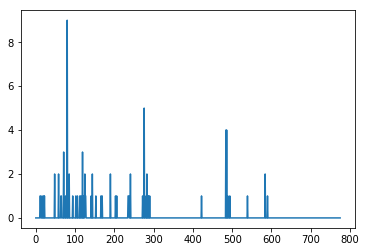

In [25]:
plt.plot(audit_risk['History'])

In [26]:
result.shape

(763, 33)

In [27]:
dup = result.duplicated(subset=None, keep = 'first')
dup

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
744    False
745    False
746    False
747    False
748    False
749    False
750    False
751    False
752    False
753    False
754    False
755    False
756    False
757    False
758    False
759    False
760    False
762    False
763    False
764    False
765    False
766    False
767    False
768    False
769    False
770    False
772    False
773    False
774    False
775    False
Length: 763, dtype: bool

In [28]:
dup.sum()

0

In [29]:
result=result.drop_duplicates(keep='first')

In [30]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 775
Data columns (total 33 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_B.1         763 non-null float64
Risk_C            763 non-null float64
Money_Value       763 non-null float64
Score_MV          763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON

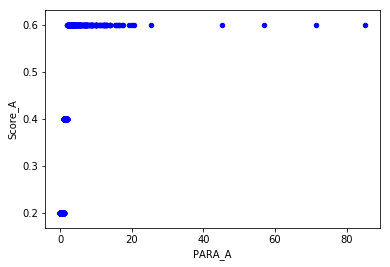

In [31]:
result.plot(kind='scatter',x='PARA_A',y='Score_A',color='blue')

In [32]:
result.LOCATION_ID.replace(['LOHARU', 'NUH', 'SAFIDON'], [10, 26, 45], inplace=True)
result.dtypes


Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Marks               int64
MONEY_Marks         int64
District            int64
Loss                int64
LOSS_SCORE          int64
History_score       int64
Risk                int64
dtype: object

In [33]:
result["LOCATION_ID"]=result["LOCATION_ID"].astype(int)
result.dtypes

Sector_score      float64
LOCATION_ID         int32
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Marks               int64
MONEY_Marks         int64
District            int64
Loss                int64
LOSS_SCORE          int64
History_score       int64
Risk                int64
dtype: object

In [34]:
def plot_corr(result,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = result.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [35]:
rc = result.corr()
print(rc)

                Sector_score  LOCATION_ID    PARA_A   Score_A    Risk_A  \
Sector_score        1.000000    -0.054881 -0.212488 -0.417980 -0.215317   
LOCATION_ID        -0.054881     1.000000 -0.008273  0.074465 -0.006064   
PARA_A             -0.212488    -0.008273  1.000000  0.494335  0.999277   
Score_A            -0.417980     0.074465  0.494335  1.000000  0.502990   
Risk_A             -0.215317    -0.006064  0.999277  0.502990  1.000000   
PARA_B             -0.130719     0.005488  0.160693  0.247950  0.164133   
Score_B            -0.210417     0.121297  0.355618  0.568595  0.360367   
Risk_B             -0.128688     0.005144  0.160618  0.246756  0.164016   
TOTAL              -0.150939     0.005253  0.265743  0.295824  0.269016   
numbers            -0.149438     0.005455  0.132210  0.240587  0.134158   
Score_B.1          -0.167585    -0.018951  0.138827  0.272179  0.141426   
Risk_C             -0.163772    -0.016387  0.138702  0.263648  0.141093   
Money_Value        -0.115

In [36]:
x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','District_Loss','History','Score','Audit_Risk','Loss']]

In [37]:
#x = result[['PARA_A','numbers','History','PARA_B','Loss','Score','PROB','Money_Value','MONEY_Marks','District','TOTAL','LOCATION_ID']]
y = result[['Audit_Risk']]

# VISUALIZATION OF DATA

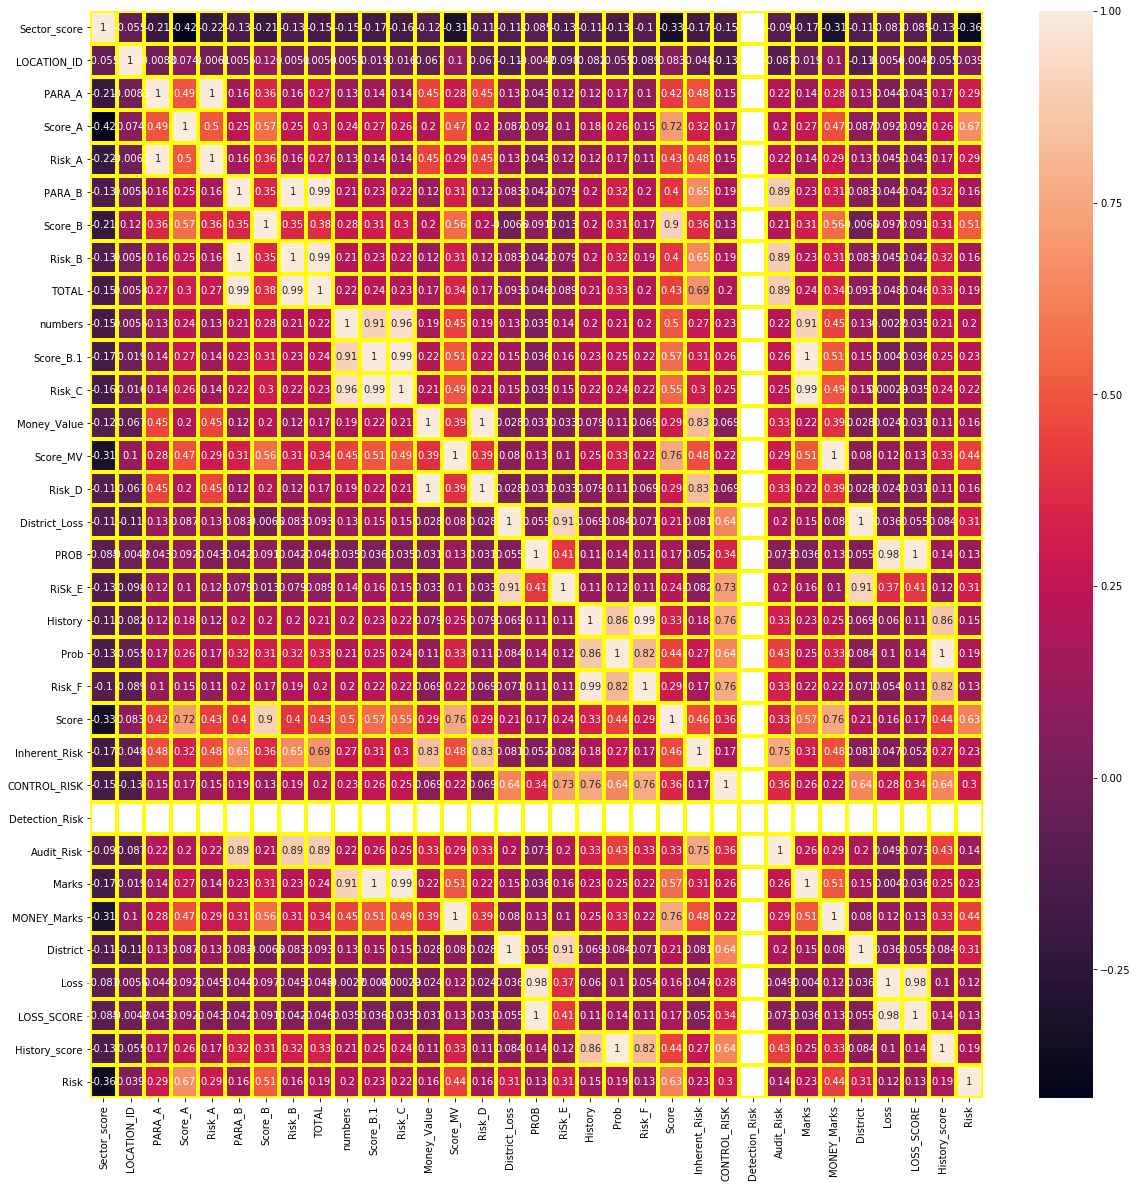

In [38]:
#CORREL MATRIX
import seaborn as sns

fig=plt.figure(figsize=(20,20))
sns.heatmap(rc,annot= True,linecolor='yellow',linewidths=3)

In [39]:
x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]

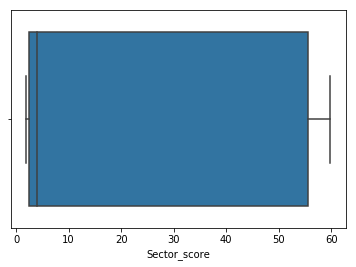

In [40]:
import seaborn as sns
sns.boxplot(x=result['Sector_score'])

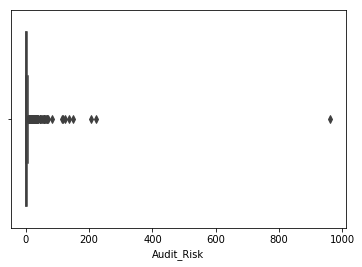

In [41]:
import seaborn as sns
sns.boxplot(x=result['Audit_Risk'])

In [42]:
result['Audit_Risk'].describe()

count    763.000000
mean       7.284109
std       38.985618
min        0.280000
25%        0.318600
50%        0.590000
75%        3.452800
max      961.514400
Name: Audit_Risk, dtype: float64

In [43]:
result.loc[result['Audit_Risk'] == 961.514400]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
241,2.72,2,4.28,0.6,2.568,1264.63,0.6,758.778,1268.91,5.5,...,2.4,0.5,961.5144,4,6,6,0,2,6,1


In [44]:
i = result[result['Audit_Risk'] == 961.514400].index

In [45]:
result = result.drop(i)

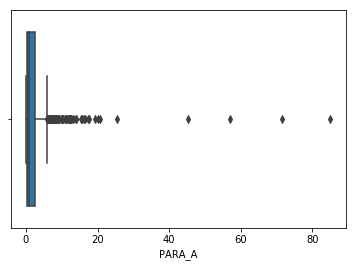

In [46]:
#PARA_A
sns.boxplot(x=result['PARA_A'])

In [47]:
result['PARA_A'].describe()

count    762.000000
mean       2.488951
std        5.721647
min        0.000000
25%        0.260000
50%        0.900000
75%        2.505000
max       85.000000
Name: PARA_A, dtype: float64

In [48]:
result.loc[result['PARA_A'] > 40.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
81,3.89,2,71.48,0.6,42.888,25.63,0.6,15.378,97.11,5.0,...,0.4,0.5,116.7376,2,6,2,0,2,2,1
342,1.99,2,57.03,0.6,34.218,134.33,0.6,80.598,191.36,5.0,...,0.4,0.5,124.5676,2,6,2,0,2,2,1
467,1.85,19,45.23,0.6,27.138,36.18,0.6,21.708,81.41,5.0,...,1.2,0.5,30.6276,2,2,6,0,2,2,1
509,21.61,9,85.00,0.6,51.000,1.06,0.4,0.424,86.06,5.0,...,1.2,0.5,32.1744,2,2,6,0,2,2,1


In [49]:
i = result.loc[result['PARA_A'] > 40.000000].index

In [50]:
result = result.drop(i)

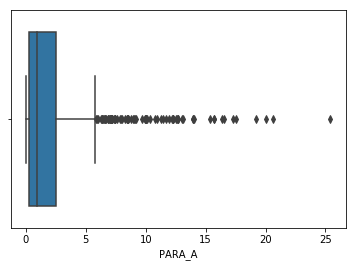

In [51]:
sns.boxplot(x=result['PARA_A'])

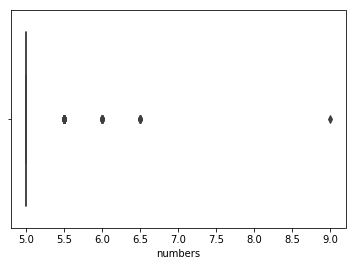

In [52]:
sns.boxplot(x=result['numbers'])

In [53]:
result['numbers'].describe()

count    758.000000
mean       5.068602
std        0.266918
min        5.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        9.000000
Name: numbers, dtype: float64

In [54]:
i = result.loc[result['numbers'] > 6.000000].index

In [55]:
result = result.drop(i)

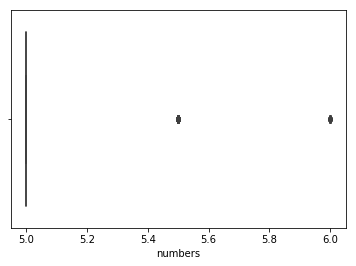

In [56]:
sns.boxplot(x=result['numbers'])

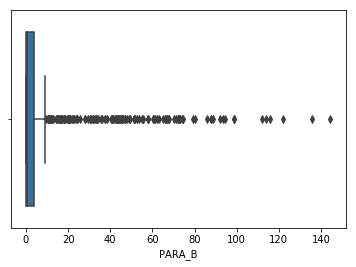

In [57]:
sns.boxplot(x=result['PARA_B'])

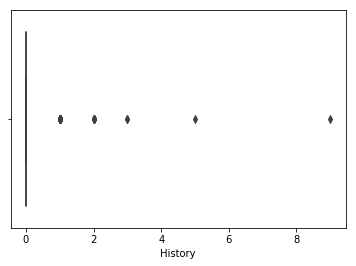

In [58]:
sns.boxplot(x=result['History'])

In [59]:
result['History'].describe()

count    750.000000
mean       0.094667
std        0.496017
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: History, dtype: float64

In [60]:
result.loc[result['History'] > 4.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
80,3.89,2,0.00,0.2,0.000,3.72,0.2,0.744,3.72,5.0,...,5.8,0.5,21.8776,2,2,2,0,2,6,1
276,2.37,6,2.51,0.6,1.506,8.59,0.6,5.154,11.10,5.5,...,3.4,0.5,37.1926,4,6,2,0,2,6,1


In [61]:
i = result.loc[result['History'] > 4.000000].index

In [62]:
result = result.drop(i)

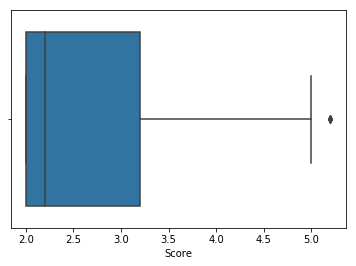

In [63]:
sns.boxplot(x=result['Score'])

In [64]:
result['Score'].describe()

count    748.000000
mean       2.682086
std        0.834048
min        2.000000
25%        2.000000
50%        2.200000
75%        3.200000
max        5.200000
Name: Score, dtype: float64

In [65]:
result.loc[result['Score'] > 5.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
93,3.89,16,15.72,0.6,9.432,57.94,0.6,34.764,73.66,6.0,...,1.2,0.5,33.2820,6,6,6,0,2,2,1
190,2.72,18,5.11,0.6,3.066,53.76,0.6,32.256,58.87,6.0,...,1.6,0.5,55.7264,6,6,2,0,2,6,1
495,15.56,1,3.73,0.6,2.238,2.82,0.6,1.692,6.55,6.0,...,1.2,0.5,62.9856,6,6,6,0,2,2,1


In [66]:
i = result.loc[result['Score'] > 5.000000].index

In [67]:
result = result.drop(i)

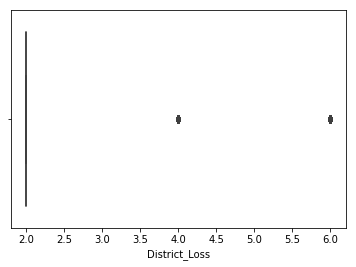

In [68]:
sns.boxplot(x=result['District_Loss'])

In [69]:
result.loc[result['District_Loss'] >= 6.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
94,3.89,16,4.9500,0.6,2.97000,42.61,0.6,25.566,47.5600,5.0,...,1.6,0.5,25.462400,2,2,6,0,2,4,1
95,3.89,16,0.0000,0.2,0.00000,0.08,0.2,0.016,0.0800,5.0,...,1.2,0.5,1.336800,2,2,6,0,2,2,1
96,3.89,16,1.1900,0.4,0.47600,12.88,0.6,7.728,14.0700,5.0,...,1.2,0.5,6.522000,2,2,6,0,2,2,1
97,3.89,16,0.0000,0.2,0.00000,2.72,0.2,0.544,2.7200,5.0,...,1.2,0.5,2.985600,2,4,6,0,2,2,1
98,3.89,16,0.0000,0.2,0.00000,1.66,0.2,0.332,1.6600,5.0,...,1.2,0.5,1.610400,2,2,6,0,2,2,1
99,3.89,16,6.4700,0.6,3.88200,12.18,0.6,7.308,18.6500,5.0,...,1.2,0.5,17.131200,2,6,6,0,2,2,1
100,3.89,16,1.3300,0.4,0.53200,0.00,0.2,0.000,1.3300,5.0,...,1.2,0.5,1.663200,2,2,6,0,2,2,1
101,3.89,16,0.0000,0.2,0.00000,1.10,0.2,0.220,1.1000,5.0,...,1.2,0.5,1.452000,2,2,6,0,2,2,1
125,3.41,12,25.4000,0.6,15.24000,51.74,0.6,31.044,77.1400,5.0,...,2.4,0.5,68.743200,2,6,6,0,2,6,1
126,3.41,12,3.2100,0.6,1.92600,72.07,0.6,43.242,75.2800,5.0,...,1.6,0.5,44.833600,2,6,6,0,2,4,1


In [70]:
result['District_Loss'].describe()

count    745.000000
mean       2.477852
std        1.190173
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: District_Loss, dtype: float64

In [71]:
i = result.loc[result['District_Loss'] >= 6.000000].index

In [72]:
result = result.drop(i)

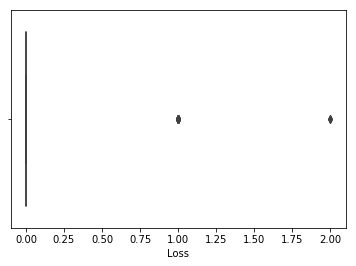

In [73]:
sns.boxplot(x=result['Loss'])

In [74]:
result.loc[result['Loss'] >= 1.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
11,3.89,8,15.38,0.6,9.228,40.14,0.6,24.084,55.52,5.0,...,1.2,0.5,21.4224,2,2,2,1,4,4,1
50,3.89,22,1.97,0.4,0.788,2.10,0.2,0.420,4.07,5.0,...,1.2,0.5,6.4692,2,6,2,2,6,2,1
85,3.89,9,8.46,0.6,5.076,72.76,0.6,43.656,81.22,5.0,...,2.0,0.5,52.0120,2,2,2,1,4,6,1
121,3.41,27,1.41,0.4,0.564,36.16,0.6,21.696,37.57,5.0,...,1.2,0.5,19.3740,2,6,2,2,6,2,1
143,3.41,7,6.61,0.6,3.966,55.62,0.6,33.372,62.23,5.0,...,0.8,0.5,29.3736,2,6,2,1,4,2,1
151,3.41,29,12.29,0.6,7.374,25.74,0.6,15.444,38.03,5.0,...,0.8,0.5,15.1512,2,6,2,1,4,2,1
164,3.41,19,0.31,0.2,0.062,58.12,0.6,34.872,58.43,5.0,...,0.8,0.5,33.6488,2,6,2,1,4,2,1
170,3.41,2,1.18,0.4,0.472,0.00,0.2,0.000,1.18,5.5,...,0.8,0.5,45.3568,4,6,2,1,4,2,1
206,2.72,13,3.84,0.6,2.304,144.39,0.6,86.634,148.23,5.0,...,1.2,0.5,61.7676,2,6,2,1,4,4,1
219,2.72,22,3.22,0.6,1.932,55.64,0.6,33.384,58.86,5.0,...,0.8,0.5,34.2384,2,6,2,1,4,2,1


In [75]:
i = result.loc[result['Loss'] >= 1.000000].index

In [76]:
result = result.drop(i)

In [77]:
result['Loss'].describe()

count    664.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Loss, dtype: float64

In [78]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(result))
print(z)

[[0.70278791 0.76223977 0.73249566 ...        nan 0.21419513 0.84865025]
 [0.70278791 0.94798931 0.65373269 ...        nan 0.21419513 1.17834172]
 [0.70278791 0.94798931 0.48459956 ...        nan 0.21419513 1.17834172]
 ...
 [1.39688538 0.14317563 0.57414063 ...        nan 0.21419513 1.17834172]
 [1.39688538 0.25923122 0.58740597 ...        nan 0.21419513 1.17834172]
 [1.39688538 0.04257392 0.65373269 ...        nan 0.21419513 1.17834172]]


C:\Users\Akash\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


# Regression models

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"> Linear Regression

In [79]:
x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]
y = result[['Audit_Risk']]

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train_org, X_test_org, y_train, y_test = train_test_split(x,y, random_state = 0) #random state

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [81]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.941816678800454
0.9186754620340322


<font color=purple>CROSS VALIDATION TECHNIQUES

In [82]:
from sklearn.model_selection import cross_val_score

scores_tr = cross_val_score(lreg, X_train, y_train, cv=5)
scores_ts = cross_val_score(lreg, X_test, y_test, cv=5)
print("Cross-validation scores for train: {}".format(scores_tr))
print("Cross-validation scores for test : {}".format(scores_ts))
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Cross-validation scores for train: [0.95024918 0.96992359 0.86595338 0.90676058 0.89215733]
Cross-validation scores for test : [0.92205629 0.85338887 0.63206558 0.86230559 0.96505314]
Average cross-validation score for train: 0.92
Average cross-validation score for test: 0.85


In [83]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(lreg, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(lreg, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[0.80524208 0.82246261 0.87100622]
Cross-validation scores for test:
[0.84192461 0.88078059 0.86087068]


Text(0.5,0,'RM')

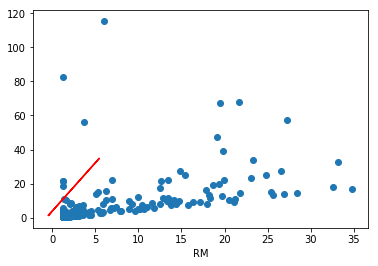

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(y_predict,y_train)
plt.xlabel('RM')


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Polynomial Regression

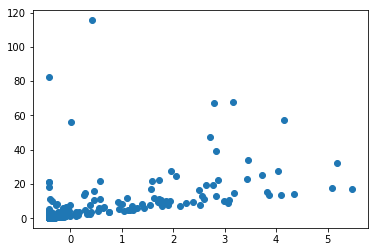

In [85]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [86]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [87]:
print(train_score_list)
print(test_score_list)

[0.941816678800454, 0.9989678528129494]
[0.9186754620340322, 0.99860111895787]


<font color=purple>Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X_train_poly, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.93583331 0.95252906 0.87266851 0.9879375  0.9975246 ]


In [89]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(lreg, X_train_poly, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(lreg, X_test_poly, y_test, cv=kfold)))

Cross-validation scores for train:
[-0.00911174  0.98445231  0.99192111]
Cross-validation scores for test:
[ 0.84700809 -0.88286366  0.51469873]


In [90]:
print("Average cross-validation score for train: {:.2f}".format(scores.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))


Average cross-validation score for train: 0.95
Average cross-validation score for test: 0.85


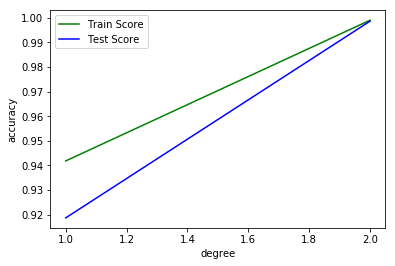

In [91]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

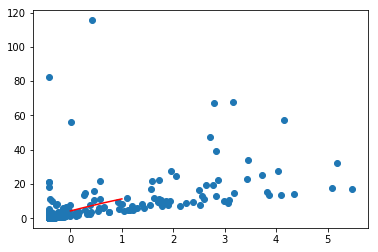

In [92]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">SGD Regression

In [93]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')#penalty-l1-l2 #learning
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9418153803190792
0.9184673967665921


<font color=purple>GRID SEARCH

In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1','l2']}
grid_search = GridSearchCV(SGDRegressor(), param_grid, return_train_score = True)
grid_search.fit(X_train, y_train)

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, t

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [95]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'penalty': 'l2'}


<font color=purple>CROSS VALIDATION

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_reg, X_train, y_train)
print("Cross-validation scores: {}".format(scores))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores: [0.80525044 0.82284828 0.87033534]


In [97]:
scores_tr = cross_val_score(sgd_reg, X_train, y_train, cv=5)

print("Cross-validation scores: {}".format(scores_tr))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validation scores: [0.9506062  0.97010078 0.86596315 0.90677421 0.89187221]


In [98]:
scores_ts = cross_val_score(sgd_reg, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores_ts))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validation scores: [0.92103594 0.85385415 0.62723122 0.86203367 0.96561426]


In [99]:
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))


Average cross-validation score for train: 0.92
Average cross-validation score for test: 0.85


In [100]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(sgd_reg, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(sgd_reg, X_test, y_test, cv=kfold)))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores for train:
[0.80525044 0.82284828 0.87033534]


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores for test:
[0.84194117 0.88096633 0.85961551]


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Ridge Regresssion

In [101]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [102]:
print(train_score_list)
print(test_score_list)

[0.9418166782701348, 0.9418166258265133, 0.9418114386961137, 0.9413436598201678, 0.9176719082759448]
[0.9186724376484781, 0.9186451885296563, 0.9183698209065175, 0.9153793541082456, 0.8803968403073018]


Text(0.5,0,'$\\alpha$')

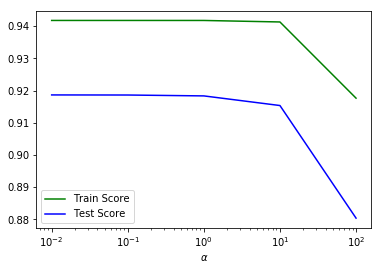

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

<font color=purple>GRID SEARCH 

In [104]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [105]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 10}


In [106]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9413
Test score: 0.9154


<font color=purple>CROSS VALIDATIONS

In [107]:
from sklearn.model_selection import cross_val_score

scores_tr = cross_val_score(ridge, X_train, y_train, cv=5)
scores_ts = cross_val_score(ridge, X_test, y_test, cv=5)
print("Cross-validation scores for train: {}".format(scores_tr))
print("Cross-validation scores for test : {}".format(scores_ts))
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Cross-validation scores for train: [0.95437112 0.97234193 0.85490566 0.90565039 0.89666195]
Cross-validation scores for test : [0.92373856 0.85768916 0.87111574 0.73619741 0.95447309]
Average cross-validation score for train: 0.92
Average cross-validation score for test: 0.87


In [108]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(ridge, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(ridge, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[0.95284087 0.80823061 0.87778553]
Cross-validation scores for test:
[0.87335566 0.83656592 0.74007986]


In [109]:
ridge.coef_

array([[ 0.10087059,  0.59636881,  3.36693781,  0.63435603,  6.72657366,
         3.83647226, -0.72144601,  0.75578353,  0.        ]])

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">LASSO 

In [110]:
#on of them receive higher value, anf rest all are negligible
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [111]:
print(train_score_list)
print(test_score_list)

[0.941794184561213, 0.9395986131390307, 0.9082296826545913, 0.0, 0.0]
[0.9182640925282302, 0.911494690392473, 0.8590386572911816, -0.0007457408497821838, -0.0007457408497821838]


Text(0.5,0,'$\\alpha$')

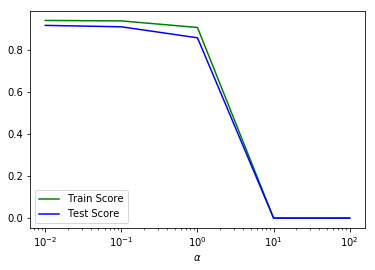

In [112]:
#suggests smaller power of alpha is the best parameter, power of 2
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

<font color=purple>GRID SEARCH 

In [113]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(), param_grid, return_train_score = True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 0.1}


<font color=purple>CROSS VALIDATION scores

In [114]:
from sklearn.model_selection import cross_val_score

scores_tr = cross_val_score(lasso, X_train, y_train, cv=5)
scores_ts = cross_val_score(lasso, X_test, y_test, cv=5)
print("Cross-validation scores for train: {}".format(scores_tr))
print("Cross-validation scores for test : {}".format(scores_ts))
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Cross-validation scores for train: [-3.79430171e-03 -2.22212602e-05 -9.53952439e-04 -1.46277693e-02
 -1.61216950e-05]
Cross-validation scores for test : [-3.12012672e-02 -2.23446537e-02 -9.70854712e-02 -4.31044748e-03
 -5.88169414e-05]
Average cross-validation score for train: -0.00
Average cross-validation score for test: -0.03


In [115]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(lasso, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(lasso, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[-0.00450922 -0.00072537 -0.00661395]
Cross-validation scores for test:
[-2.37984342e-02 -1.56842050e-07 -5.96000207e-03]


<font color=purple>VISUALIZATION

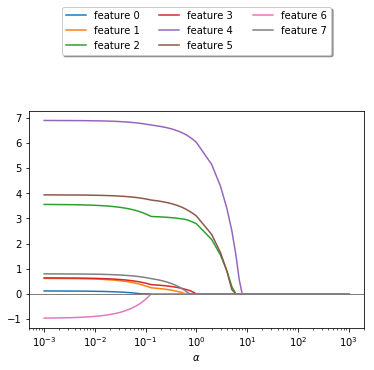

In [116]:
#multi colinearity is not a probl in ml; 
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">KNN Regressor

In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(x,y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Text(0,0.5,'MSE')

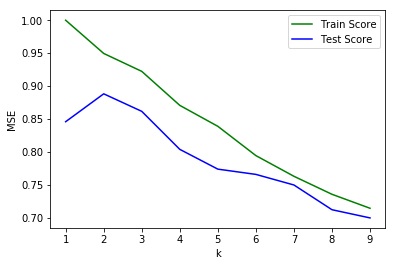

In [118]:
#this generally overfits, but if still if we want, we choose 1, since atleast 
#the test and train score is highest
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [119]:
print(train_score_array)
print(test_score_array)


[1.0, 0.949534784595555, 0.922311941343433, 0.870630995943229, 0.8388043964016264, 0.7943045925385845, 0.7628678416982348, 0.7355136881315326, 0.7142830576540113]
[0.845840469058989, 0.8881863460878919, 0.8615584138763992, 0.8037874339423459, 0.7737384420856848, 0.7657481225525271, 0.7496486421464754, 0.7120726997471046, 0.6996206815834819]


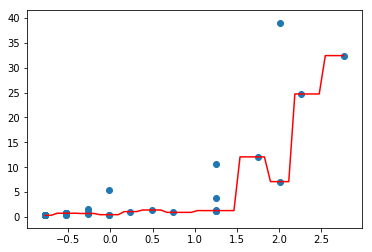

In [120]:

X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(1)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

<font color=purple>CROSS VALIDATION SCORES

In [121]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores for train:\n{}".format(cross_val_score(knn_reg, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(knn_reg, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[0.75300686 0.76676516 0.80790769 0.86487605 0.70735587]
Cross-validation scores for test:
[0.89576307 0.83034843 0.61520757 0.3117804  0.55029848]


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">  SVR

In [122]:
from sklearn.model_selection import KFold
kfold1 = KFold(n_splits = 4, random_state=0)
from sklearn.model_selection import cross_val_score

In [123]:

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]
y = result[['Audit_Risk']]

X_train_org, X_test_org, y_train, y_test = train_test_split(x, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

svr_l = SVR(kernel = 'linear', C = 100, gamma = 10)
svr_l.fit(X_train, y_train)
print(svr_l.score(X_train, y_train))
print(svr_l.score(X_test, y_test))

0.9250577966152623
0.87754772929085


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
svr_r = SVR(kernel = 'rbf', C = 100, gamma = 10)
svr_r.fit(X_train, y_train)
print(svr_r.score(X_train, y_train))
print(svr_r.score(X_test, y_test))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9998495472883501
0.7689041337509936


<font color=purple>GRID SEARCH for best parameters

In [125]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter' :[50000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=kfold1, return_train_score = True)

grid_search.fit(X_train, y_train)

test = cross_val_score(grid_search, X_test, y_test, scoring='r2',cv=kfold1).mean()

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [126]:
print("Train Score: {:.5f}".format(grid_search.best_score_))
print("Test Score: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train Score: 0.89522
Test Score: 0.85080
best parameters are: {'C': 100, 'max_iter': 50000}


In [127]:
from sklearn.model_selection import KFold
kfold1 = KFold(n_splits = 5, random_state=0)
from sklearn.model_selection import cross_val_score

In [128]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter' :[50000]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=kfold1, return_train_score = True)

grid_search.fit(X_train, y_train)

test = cross_val_score(grid_search, X_test, y_test, scoring='r2',cv=kfold1).mean()

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [129]:
print("Train Score: {:.5f}".format(grid_search.best_score_))
print("Test Score: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train Score: 0.81841
Test Score: 0.77602
best parameters are: {'C': 100, 'max_iter': 50000}


<font color='purple'>CROSS VALIDATION

In [130]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores of linear for train:\n{}".format(cross_val_score(svr_l, X_train, y_train, cv=kfold)))
print("Cross-validation scores of linear for test:\n{}".format(cross_val_score(svr_l, X_test, y_test, cv=kfold)))
print("Cross-validation scores of rbf for train:\n{}".format(cross_val_score(svr_r, X_train, y_train, cv=kfold)))
print("Cross-validation scores of rbf for test:\n{}".format(cross_val_score(svr_r, X_test, y_test, cv=kfold)))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores of linear for train:
[0.95926581 0.80249756 0.88150479]


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores of linear for test:
[0.9182423  0.80279264 0.65578351]
Cross-validation scores of rbf for train:
[0.35322915 0.47252909 0.79389827]
Cross-validation scores of rbf for test:
[0.7878341  0.34527191 0.37061812]


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

## Observations for Regression
Taking the case of regression, we have run each of the regression models to observe which one delivers the best score. 
Initially, we make use of the boxplot to check for outliers in each of the feature set values. After checking for outliers and removing them
in each of the feature set variables, we find that there is not much of a case of an overfit or an underfit. The main reason for removal of outliers 
is to compromise on our model as a whole due to a small set of extreme values. That can be seen from each of the model scores. The best model 
of all the regression models is the linear regression in our case because that yields us a score of 94% in the train against a 91% in the test.
None of the other models for regression came this high or close. Since, the linear regression model yields such a good score in the train and test, 
the other models such as the ridge, lasso and the polynomial does not matter much as they are mostly used when the linear model does not deliver a good score.


# CLASSIFICATION TASK

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]
y = result[['Risk']]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

<font color='purple'>KNN CLASSIFIER

In [133]:
x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]
y = result[['Risk']]

In [134]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [135]:
X_train_org, X_test_org, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [136]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

C:\Users\Akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A

In [137]:
print("Train score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test score: {:.2f}".format(knn.score(X_test, y_test)))

Train score: 0.99
Test score: 1.00


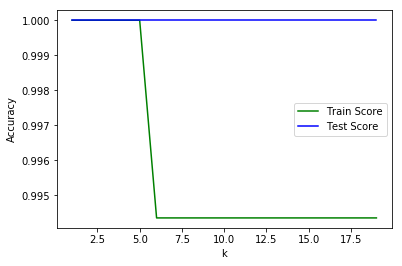

In [138]:
#k=1 will have oevrfitting?/ 10 is the best: high test n train score and 
#ever similar to each other
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

<font color='purple'>CROSS VALIDATION

In [139]:
from sklearn.model_selection import cross_val_score

scores_tr = cross_val_score(knn, X_train, y_train, cv=5)
scores_ts = cross_val_score(knn, X_test, y_test, cv=5)
print("Cross-validation scores for train: {}".format(scores_tr))
print("Cross-validation scores for test : {}".format(scores_ts))
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Cross-validation scores for train: [0.99065421 1.         0.9245283  1.         0.98095238]
Cross-validation scores for test : [0.92857143 0.81481481 0.92307692 0.84615385 0.88461538]
Average cross-validation score for train: 0.98
Average cross-validation score for test: 0.88


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

In [140]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(knn, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(knn, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[0.99435028 0.92655367 0.98870056]
Cross-validation scores for test:
[0.88888889 0.75       0.86363636]


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

<font color=purple> EVALUATION

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn_e = KNeighborsClassifier().fit(X_train, y_train)
pred_knn_e = knn_e.predict(X_test)
print("Test score: {:.2f}".format(knn_e.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
print("\nKNN classifier:")
print(confusion_matrix(y_test, pred_knn_e))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_knn_e, target_names=["0", "1"]))

Test score: 1.00

KNN classifier:
[[61  0]
 [ 0 72]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        61
          1       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00       133



C:\Users\Akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"> SVC

In [142]:
from sklearn.metrics import precision_recall_curve

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X_train, y_train)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (1, 9)
Intercept shape:  (1,)


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]
y = result[['Risk']]

X_train_org, X_test_org, y_train, y_test = train_test_split(x, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

svc_l1 = SVC(kernel ='linear', C = 0.1, gamma = 10)
svc_l1.fit(X_train, y_train)
print(svc_l1.score(X_train, y_train))
print(svc_l1.score(X_test, y_test))

0.9317269076305221
0.9698795180722891


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
svc_r1 = SVC(kernel = 'rbf', C = 0.1, gamma = 10)
svc_r1.fit(X_train, y_train)
print(svc_r1.score(X_train, y_train))
print(svc_r1.score(X_test, y_test))

0.9317269076305221
0.9397590361445783


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font color=purple> GRID SEARCH for best paramters

In [146]:
import numpy as np

from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(x, y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)


best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            



C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [147]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [148]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'C': 100, 'max_iter': 50000}


In [149]:
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

Train set score with best parameters: 1.00
Test set score with best parameters: 0.99


In [150]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
grid_search.fit(X_train, y_train)



C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [151]:
print("Best parameters for linear SVC: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters for linear SVC: {'C': 1, 'gamma': 0.001}
Best cross-validation score: 1.00


In [152]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
grid_search.fit(X_train, y_train)


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [153]:
print("Best parameters for rbf SVC: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters for rbf SVC: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 1.00


<font color=purple> CROSS VALIDATION

In [154]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores of linear for train:\n{}".format(cross_val_score(svc_l1, X_train, y_train, cv=kfold)))
print("Cross-validation scores of linear for test:\n{}".format(cross_val_score(svc_l1, X_test, y_test, cv=kfold)))
print("Cross-validation scores of rbf for train:\n{}".format(cross_val_score(svc_r1, X_train, y_train, cv=kfold)))
print("Cross-validation scores of rbf for test:\n{}".format(cross_val_score(svc_r1, X_test, y_test, cv=kfold)))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validation scores of linear for train:
[0.97590361 0.98795181 0.98192771]
Cross-validation scores of linear for test:
[0.85714286 0.90909091 0.89090909]
Cross-validation scores of rbf for train:
[0.73493976 0.68072289 0.70481928]
Cross-validation scores of rbf for test:
[0.58928571 0.61818182 0.45454545]


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font color=purple>MODEL EVALUATION using best parameters:
    

In [155]:
svc_l = SVC(kernel = 'linear', C = 0.1, gamma = 10).fit(X_train, y_train)
pred_svc_l = svc_l.predict(X_test)
print("svc linear score: {:.2f}".format(svc_l.score(X_test, y_test)))


print("\nSVC-linear")
print(confusion_matrix(y_test, pred_svc_l))


from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svc_l, target_names=["0", "1"]))

svc linear score: 0.99

SVC-linear
[[79  0]
 [ 2 85]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        79
          1       1.00      0.98      0.99        87

avg / total       0.99      0.99      0.99       166



C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
svc_r = SVC(kernel = 'rbf', C = 0.1, gamma = 10).fit(X_train, y_train)
pred_svc_r = svc_r.predict(X_test)
print("svc rbf score: {:.2f}".format(svc_r.score(X_test, y_test)))

print("\nSVC-rbf")
print(confusion_matrix(y_test, pred_svc_r))

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svc_r, target_names=["0", "1"]))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svc rbf score: 0.70

SVC-rbf
[[29 50]
 [ 0 87]]
             precision    recall  f1-score   support

          0       1.00      0.37      0.54        79
          1       0.64      1.00      0.78        87

avg / total       0.81      0.70      0.66       166



<font color=purple>Precision - Recall - Linear (best score)

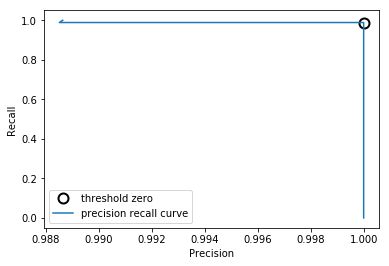

In [157]:
%matplotlib notebook
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, svc_l.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

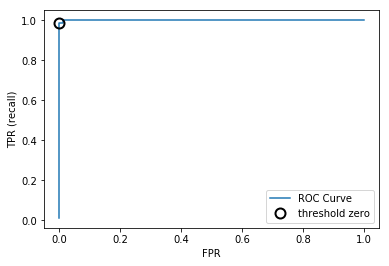

In [158]:
%matplotlib notebook 
%matplotlib inline

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc_l.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

gamma = 1.00  accuracy = 0.99  AUC = 1.00
gamma = 0.10  accuracy = 0.99  AUC = 1.00
gamma = 0.01  accuracy = 0.96  AUC = 1.00


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


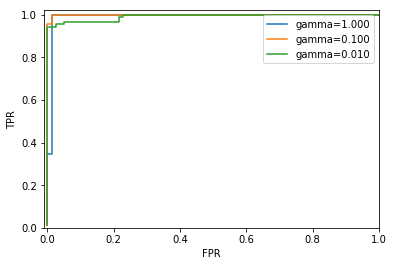

In [159]:
%matplotlib notebook
%matplotlib inline

from sklearn.metrics import roc_auc_score

#y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc_l.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
    	gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">LOGISTIC REGRESSION 

In [160]:
import pandas as pd



In [161]:
x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]
y = result[['Risk']]

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(x,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [163]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [164]:
print(train_score_l1, train_score_l2)
print(test_score_l1, test_score_l2)

[0.39959839357429716, 0.39959839357429716, 0.9457831325301205, 1.0, 1.0, 1.0, 1.0] [0.6004016064257028, 0.6385542168674698, 0.7751004016064257, 0.9598393574297188, 0.9738955823293173, 1.0, 1.0]
[0.4759036144578313, 0.4759036144578313, 0.9698795180722891, 1.0, 1.0, 1.0, 1.0] [0.5240963855421686, 0.5843373493975904, 0.7951807228915663, 0.9698795180722891, 0.9759036144578314, 1.0, 1.0]


<font color=purple>GRID SEARCH for best parameters

In [165]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, return_train_score = True)
grid_search.fit(X_train, y_train)

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [166]:
print("Best parameters for linear logistic Regression: {}".format(grid_search.best_params_))

Best parameters for linear logistic Regression: {'penalty': 'l1'}


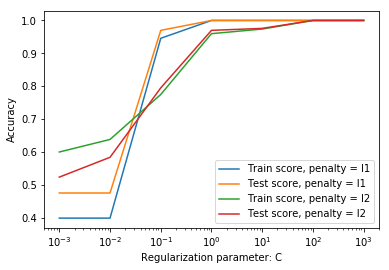

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [168]:
from sklearn.linear_model import LogisticRegression

log1 = LogisticRegression(penalty = 'l2', random_state = 0)
log1.fit(X_train,y_train)

print("logreg score: {:.2f}".format(log1.score(X_test, y_test)))
print("logreg train score: {:.2f}".format(log1.score(X_train, y_train)))

logreg score: 0.97
logreg train score: 0.96


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font color=purple>CROSS VALIDATIONS

In [169]:
from sklearn.model_selection import cross_val_score

scores_tr = cross_val_score(log1, X_train, y_train, cv=5)
scores_ts = cross_val_score(log1, X_test, y_test, cv=5)
print("Cross-validation scores for train: {}".format(scores_tr))
print("Cross-validation scores for test : {}".format(scores_ts))
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Cross-validation scores for train: [0.97       0.95       0.92       0.96       0.98979592]
Cross-validation scores for test : [0.91176471 0.91176471 0.96969697 0.93939394 0.9375    ]
Average cross-validation score for train: 0.96
Average cross-validation score for test: 0.93


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [170]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(log1, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(log1, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[0.96987952 0.91566265 0.97590361]
Cross-validation scores for test:
[0.875      0.87272727 0.98181818]


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

<font color=purple>MODEL EVALUATION 

In [171]:
logreg = LogisticRegression(C=1, penalty = 'l2').fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))



from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names=["0", "1"]))

logreg score: 0.97

Logistic Regression
[[79  0]
 [ 5 82]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97        79
          1       1.00      0.94      0.97        87

avg / total       0.97      0.97      0.97       166



C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"> DECISION TREE

In [172]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0)

dtree = DecisionTreeClassifier(random_state=0)
#goes full length; no early stopping 
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


<font color=purple>Grid Search for best parameters

In [173]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [174]:
print("best parameters are:",grid_search.best_params_)

best parameters are: {'max_depth': 1}


In [175]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0) #max depth is early stopping
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


<font color=purple>CROSS VALIDATIONS

In [176]:
from sklearn.model_selection import cross_val_score

scores_tr = cross_val_score(dtree, X_train, y_train, cv=5)
scores_ts = cross_val_score(dtree, X_test, y_test, cv=5)
print("Cross-validation scores for train: {}".format(scores_tr))
print("Cross-validation scores for test : {}".format(scores_ts))
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Cross-validation scores for train: [1. 1. 1. 1. 1.]
Cross-validation scores for test : [1. 1. 1. 1. 1.]
Average cross-validation score for train: 1.00
Average cross-validation score for test: 1.00


In [177]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(dtree, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(dtree, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[1. 1. 1.]
Cross-validation scores for test:
[1. 1. 1.]


<font color=purple>MODEL EVALUATION using best parameters

In [178]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names=["0", "1"]))

Test score: 1.00

Decision tree:
[[70  0]
 [ 0 96]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        70
          1       1.00      1.00      1.00        96

avg / total       1.00      1.00      1.00       166



## Observations for Classification
A good evaluation strategy in this case would be the precision because while comparing each of the strategies for each model, we find the precision to yield the best score.

The decision tree model yeilds the best result and in this case, yeilds a perfect score. The decision tree is onsidered one of the best models because of the ease of interpretation  
and also due to the ability to map non-linear relationships as well. Decision tree works for both categorical as well as continous variables and due to the overall feature set selection 
again could be one of the main contributing factors for the scores.
Best parameter for Max_depth of a decision tree comes out to be 1 using the grid search
